# Ch/ChE 164 Project
## Marta Gonzalvo
## March 18$^{\mathrm{th}}$, 2020

In this python notebook I have included both the required analysis and results, as well as the necessary code. Below all the necessary imports:

In [196]:
#import itertools
import numpy as np
import pandas as pd
from scipy import optimize
#import scipy.stats
import matplotlib.pyplot as plt

#import bokeh_catplot

#import bokeh.io
#import bokeh.plotting

#bokeh.io.output_notebook()

## 0. Energy

#### a) Occupation of cells contribution:
\begin{align}
    4\,\epsilon \sum_{i=1}^{L}s_i
\end{align}
Each water cell is surrounded by 4 nanotube cells.  If $s_i = 1$, the contribution will be $4\,\epsilon$, and if $s_i = -1$, the contribution will be $-4\,\epsilon$. So the penalty per cell of water occupation is of $2\,\epsilon$.
#### b) Pairing of spins contribution:
\begin{align}
    - J \sum_{j=0}^{L}s_j s_{j+1}
\end{align} 
So for $L$ cells there are $L+1$ interactions, and we use the same method as above to penalyze different adjacent occupations by $2J$. And taking into account the boundary conditions, where the adjacent cells to the $s_1$ and $s_L$ cells will always be filled with water: $s_0 = s_{i+1} = 1$, we can rewrite that as 
\begin{align}
    - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}
So the Hamiltonian has the form of 
\begin{align}
   H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}

Code to calculate the hamiltonian energy:

In [2]:
def Energy(eps, J, spins):
    '''Computes the Energy for a given microstate, unitless (E/(kB*T).
    eps, J are unitless constants (divided by kB*T), spins is a list.'''
    
    coup_wat_nanot = 4*eps*np.sum(spins)
    
    coup_spins = [spins[i]*spins[i+1] for i,_ in enumerate(spins[:-1])]
    coup_wat = - J*(np.sum(coup_spins) + spins[0] + spins[-1])
    
    return coup_wat_nanot + coup_wat

Testing function Energy.

In [3]:
spins_L = [1,1,1,1,1]
spins_0 = [-1,-1,-1,-1,-1]
spins_other = [1, -1, 1]
e_test = 1
J_test = 2

print('Energy N=L, E=', Energy(e_test, J_test, spins_L))
print('Energy N=0, E=',Energy(e_test, J_test, spins_0))
print('Energy test 3, E=',Energy(e_test, J_test, spins_other))

Energy N=L, E= 8
Energy N=0, E= -24
Energy test 3, E= 4


Function to generate all possible microstates:

In [4]:
def microstates(L=5, s_vals=[-1,1]):
    '''Generates all possible microstates, 
    given length of system and possible values of s_i'''
    
    return np.unique(np.random.choice(s_vals, size=(L*200,L)), axis=0)

In [5]:
print(len(microstates()))
microstates()

32


array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1],
       [-1, -1, -1,  1, -1],
       [-1, -1, -1,  1,  1],
       [-1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1],
       [-1, -1,  1,  1, -1],
       [-1, -1,  1,  1,  1],
       [-1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1],
       [-1,  1, -1,  1, -1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1],
       [ 1, -1, -1, -1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1, -1,  1,  1,  1],
       [ 1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1],
       [ 1,  1,  1, -1, -1],
       [ 1,  1,  1, -1,  1],
       [ 1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1]])

Better way of doing below: unfinished.

In [6]:
#microst = ["".join(seq) for seq in itertools.product("01", repeat=5)]
#microst_string = [list(i) for i in microst]
#microst_string

# Part 1

The partition function for the system is 
\begin{align}
 Z = \sum_{\{s\}} e^{-\beta H(\{s\})}.
\end{align}
So the probability for  a macrostate is 
\begin{align}
P(N)= \frac{\sum_{\{s\}} e^{-\beta H(\{s\})}\delta(N-\sum^L_{i=1}m_i(s_i))}{\sum_{\{s\}} e^{-\beta H(\{s\})}}, 
\end{align}
where $m_i(s_i) = \frac{1+s_i}{2}$, and $\sum_i m_i = N$.

For the case where the totally filled ($N=L$) and totally empty ($N=0$) microstates are degenerate, $H\,\{1,1,1,1,1\} = H\,\{-1,-1,-1,-1,-1\}$.
\begin{align}
H\,\{s\} &= 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L \\
H\,\{1,1,1,1,1\} &= 4\,\epsilon \, 5 - 4 J  - J - J  = 20 \, \epsilon - 6 J \\
H\,\{-1,-1,-1,-1,-1\} &= - 4\,\epsilon \, 5 - 4 J  + J + J = - 20 \, \epsilon - 2 J \\
H\,\{1,1,1,1,1\} &= H\,\{-1,-1,-1,-1,-1\} \\
20 \, \epsilon - 6 J &= - 20 \, \epsilon - 2 J \\
40 \, \epsilon &=  4 J \\
\epsilon &= 0.1 J = \frac{J}{10}
\end{align}


# J/KBt ETC!

In [7]:
def partition_fn(eps, J, microstates=microstates()):
    '''Returns partition function for all microstates.'''
    
    return np.sum(np.exp(-Energy(eps, J, spins)) for spins in microstates)

In [8]:
def m_i(spins):
    '''Computes list of m_i, given list of spins.
    s_i=1, m_i=1. s_i=-1, m_i=0'''
    
    m_i = [(1+s)/2 for s in spins]
    return m_i

Testing m_i function.

In [9]:
spins_L = [1,1,1,1,1]
spins_0 = [-1,-1,-1,-1,-1]
spins_other = [1, -1, 1]

print('L, m_i', m_i(spins_L))
print('0, m_i', m_i(spins_0))
print('other, m_i', m_i(spins_other))

L, m_i [1.0, 1.0, 1.0, 1.0, 1.0]
0, m_i [0.0, 0.0, 0.0, 0.0, 0.0]
other, m_i [1.0, 0.0, 1.0]


Calculate probability of a single microstate. 

In [10]:
def probability_microstate(eps, J, spins, N, L=5, microstates=microstates()):    
    '''Computes probability of given microstate. 
    Microstates is list of lists of spins. 
    Returns a single value'''
    
    if np.sum(m_i(spins)) == N:
        
        return np.exp(-Energy(eps, J, spins))/partition_fn(eps, J, microstates)
    else:
        
        return 0 

Calculates the probability of a macrostate. Possible macrostates: $\{N\}=\{0, 1, 2, 3, 4, 5\}$.

In [11]:
def probability_macrostate(eps, J, N, L=5, microstates=microstates()):    
    '''Computes probability of given macrostate. 
    Microstates is list of lists of spins.
    Returns a single value.'''
        
    return np.sum([probability_microstate(eps, J, spins, N, L, microstates) 
                   for spins in microstates])

Calculate list of probability of all macrostates.

In [12]:
def all_probs(eps, J, L=5, microstates=microstates()):
    '''Calculates all probabilities for all macrostates.
    Returns a list of probabilities for each macrostate.'''
    all_probs = []
    
    for N in list(range(L+1)):
        
        prob_N = np.sum([probability_microstate(eps, J, spins, N, L, microstates) 
                         for spins in microstates])
        all_probs.append(prob_N)
        
    return all_probs

Plot of $P(N)$.

In [13]:
macrostates = [0,1,2,3,4,5]

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


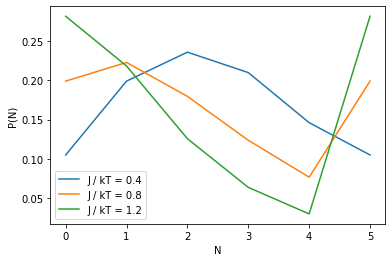

In [14]:
J_part1 = [0.4, 0.8, 1.2]

for J in J_part1:
    plt.plot(macrostates, all_probs(J/10, J), label='J / kT = {}'.format(J));
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');

# INTERPRET RESULTS
J increasing or T decreasing as p.4-> 0.8
J: energy of creating a surface
if J=0: no E penalty, doesn't matter if gas or water. Low J, low surface tension, high J, high surface tension
high J: most likely no interface
(opposite as here)

REVISIT PLOT

Checking how these results match with the number of microstates for each macrostate.

| N | # microstates |
|---|----|
| 0 | 1 |
| 1 | 5 |
| 2 | 10 |
| 3 | 5 |
| 4 | 10 |
| 5 | 1 |

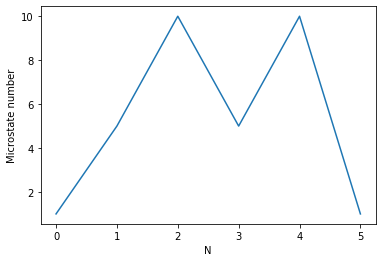

In [15]:
mic_numb = [1,5,10,5,10,1]
plt.plot(macrostates, mic_numb);
plt.xlabel('N');
plt.ylabel('Microstate number');

Calculating free energy $F(N)$.

In [16]:
def free_energy(eps, J, L=5, microstates=microstates()):
    '''Calculates free energy given the probability for a macrostate.'''

    return -np.log(all_probs(eps, J, L, microstates))

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


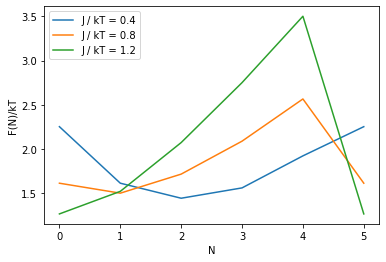

In [17]:
for J in J_part1:
    plt.plot(macrostates, free_energy(J/10, J), label='J / kT = {}'.format(J));

plt.legend();
plt.xlabel('N');
plt.ylabel('F(N)/kT');

# interpret results

## Surface tension

For each interface of area $d^2 = 3.7^2 \, \unicode[serif]{xC5} ^2 $, there is a $2J$ penalty, so the expression relating the two using the surface tension is 
\begin{align}
2 J = \gamma d^2.
\end{align}
Using the value of $\gamma = 72$ mN/m $= 72$ mJ/$\mathrm{m}^2 =$ 0.072 J/$\mathrm{m}^2$, we can get $J$, or $J/k_B T$:
\begin{align}
2 J & = \gamma d^2 \\
2 J & = 0.072 \, \mathrm{J/m}^2 \, (3.7·10^{-10})^2 \, \mathrm{m}^2 \\
J & = 4.928·10^{-21}\\
J/k_B T & = 1.2
\end{align}

The value that corresponds to $J/k_B T$ at room temperature is $J/k_B T = 1.2$.

In [18]:
# Calculation
J = ((3.7*(10**(-10)))**2 * 0.072/2)
print(J)
J/(298*1.380649*(10**(-23)))

4.9284000000000005e-21


1.197860935948025

# Part 2

In this plot above I show filled, empty and bistable occupancy. In the plots below I show the three separately, so they are easier to identify:

- under 0.05 mostly filled
- when $\epsilon = \, J \, / \, 10$, bistable
- over 0.4 mostly empty


C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


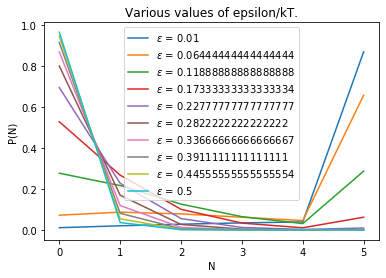

In [19]:
eps_var = np.linspace(0.01,0.5, 10)
J_rt = 1.198

for eps in eps_var:
    plt.plot(macrostates, all_probs(eps, J_rt), label='$\epsilon$ = {}'.format(eps));

plt.title('Various values of epsilon/kT.')
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


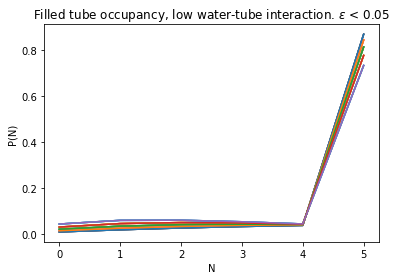

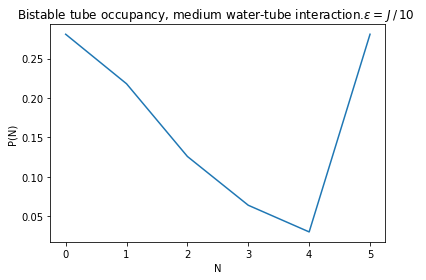

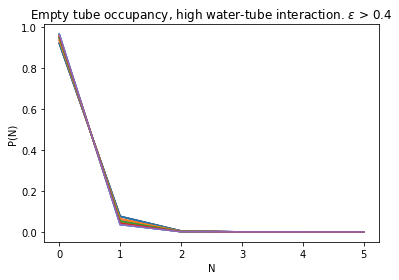

In [20]:
#Defining epsilon values
eps_filled = np.linspace(0.01,0.05, 5)
eps_empty = np.linspace(0.4,0.5, 5)

#Filled
for eps in eps_filled:
    plt.plot(macrostates, all_probs(eps_filled, J_rt));

plt.title('Filled tube occupancy, low water-tube interaction. $\epsilon$ < 0.05')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()

#Bistable
#for eps in eps_bistable:
    #plt.plot(macrostates, all_probs(eps_bistable, J_rt));
plt.plot(macrostates, all_probs(J_rt/10, J_rt))
plt.title('Bistable tube occupancy, medium water-tube interaction.$\epsilon = \, J \, / \, 10$  ')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()



#Empty
for eps in eps_empty:
    plt.plot(macrostates, all_probs(eps_empty, J_rt));

plt.title('Empty tube occupancy, high water-tube interaction. $\epsilon$ > 0.4')
plt.xlabel('N');
plt.ylabel('P(N)');

# Part 3

First, trying to analyze the values of J vs $\epsilon$ for the different P(N), including peaks and non-peaks:

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


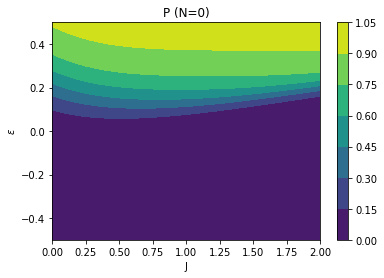

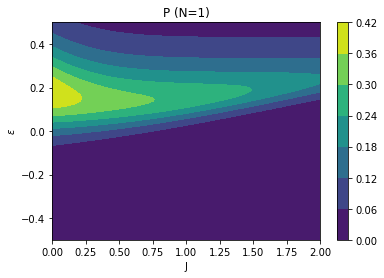

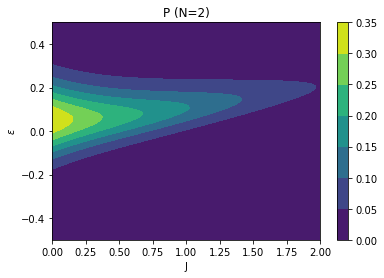

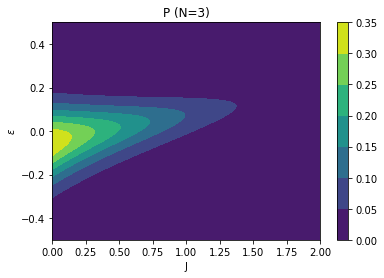

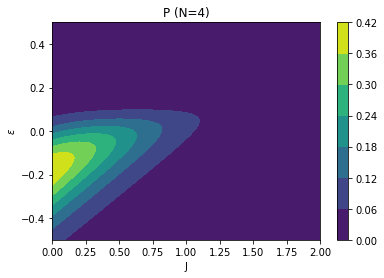

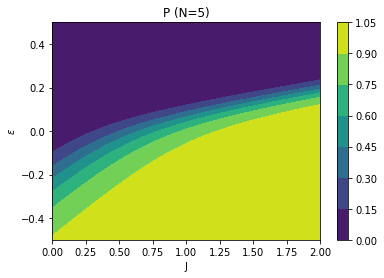

In [180]:
J_part3 = np.linspace(0, 2, 100) # my previous limits: (-1, 2)
eps_part3 = np.linspace(-0.5, 0.5, 100) # my previous limits: (-1, 5)

J_mesh, ep_mesh = np.meshgrid(J_part3, eps_part3)


for N in macrostates:
    
    P = probability_macrostate(ep_mesh, J_mesh, N)
    plt.figure()
    plt.contourf(J_mesh, ep_mesh, P)
    plt.title('P (N={})'.format(N))
    plt.xlabel('J')
    plt.ylabel('$\epsilon$')
    plt.colorbar()


Now, writing a function to find the peaks in given P(J, $\epsilon$).

In [149]:
def find_peaks(eps, J, L=5, microstates=microstates()):
    '''Finds peaks of probability distribution of macrostates for given parameters.'''
    probs = all_probs(eps, J)
    peaks = []
    
    for i, p in enumerate(probs):
        if i == 0:
            if p > probs[i+1]:
                peaks.append(i)
            
        if i > 0 and i < L: 
            if p > probs[i-1] and p > probs[i+1]:
                peaks.append(i)
            
        if i == L:
            if p > probs[i-1]:
                peaks.append(i)
                   
    total_peaks = np.sum(len(peaks))
    
    # More than one peak
    if total_peaks > 1:
        largest_prob = np.argmax([probs[i] for i in peaks])
        return [eps, J, total_peaks, largest_prob] 

    # Only one peak
    return [eps, J, total_peaks, peaks]

Calculating necessary data. It is commented so that it doesn't run again when I run the whole notebook. I saved the orignial results in a file so I can load it (see cell below). 

In [159]:
eps_part3 = np.linspace(0, 0.5, 50) # my previous limits: (-1, 5)
J_part3 = np.linspace(0, 2, 50) # my previous limits: (-1, 2)
ep_mesh, J_mesh = np.meshgrid(eps_part3, J_part3)

#peak_info = []
#for eps, Js in zip(ep_mesh, J_mesh):
#    for ep, J in zip(eps,Js):
#        peaks = find_peaks(ep,J)
#        peak_info.append([ep, J, find_peaks(ep,J)])

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


Saving results to csv so I don't have to run it again (takes several minutes).

In [169]:
df_peak_info = pd.DataFrame(peak_info)
df_peak_info.to_csv (r'peak_info.csv', index = False) 
df_peak_info.head()

,0,1,2
0,0.000000,0.0,"[0.0, 0.0, 0, []]"
1,0.010204,0.0,"[0.01020408163265306, 0.0, 1, [2]]"
2,0.020408,0.0,"[0.02040816326530612, 0.0, 1, [2]]"
3,0.030612,0.0,"[0.030612244897959183, 0.0, 1, [2]]"
4,0.040816,0.0,"[0.04081632653061224, 0.0, 1, [2]]"


Loading the dataframe and turning it back onto a list.

In [170]:
df_loaded = pd.read_csv('peak_info.csv')
peak_info_loaded = df_loaded.values.tolist()

[[0.0, 0.0, '[0.0, 0.0, 0, []]'],
 [0.010204081632653059, 0.0, '[0.01020408163265306, 0.0, 1, [2]]'],
 [0.020408163265306117, 0.0, '[0.02040816326530612, 0.0, 1, [2]]'],
 [0.030612244897959183, 0.0, '[0.030612244897959183, 0.0, 1, [2]]'],
 [0.040816326530612235, 0.0, '[0.04081632653061224, 0.0, 1, [2]]'],
 [0.0510204081632653, 0.0, '[0.0510204081632653, 0.0, 1, [2]]'],
 [0.061224489795918366, 0.0, '[0.061224489795918366, 0.0, 1, [2]]'],
 [0.07142857142857142, 0.0, '[0.07142857142857142, 0.0, 1, [2]]'],
 [0.08163265306122447, 0.0, '[0.08163265306122448, 0.0, 1, [2]]'],
 [0.09183673469387754, 0.0, '[0.09183673469387754, 0.0, 1, [1]]'],
 [0.1020408163265306, 0.0, '[0.1020408163265306, 0.0, 1, [1]]'],
 [0.11224489795918366, 0.0, '[0.11224489795918366, 0.0, 1, [1]]'],
 [0.12244897959183673, 0.0, '[0.12244897959183673, 0.0, 1, [1]]'],
 [0.13265306122448978, 0.0, '[0.13265306122448978, 0.0, 1, [1]]'],
 [0.14285714285714285, 0.0, '[0.14285714285714285, 0.0, 1, [1]]'],
 [0.1530612244897959, 0.0

Making the phase diagram.

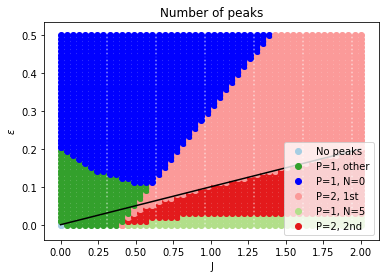

In [179]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

n_0, n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8 = 0,0,0,0,0,0,0,0,0

for p in peak_info:
    if p[2][2] == 0:
        if n_0 == 0:
            plt.scatter(p[1], p[0], color=colors[0], label='No peaks')
        plt.scatter(p[1], p[0], color=colors[0])
        n_0 +=1
    # 1 peak
    ## Empty
    if p[2][2] == 1 and p[2][3]==[0]:
        if n_1 == 0:
            plt.scatter(p[1], p[0], color='blue', label='P=1, N=0')
        plt.scatter(p[1], p[0], color='blue')
        n_1 +=1
    ## Full
    if p[2][2] == 1 and p[2][3]==[5]:
        if n_2 == 0:
            plt.scatter(p[1], p[0], color=colors[2], label='P=1, N=5')
        plt.scatter(p[1], p[0], color=colors[2])
        n_2 +=1
    ## Elsewhere
    if p[2][2] == 1 and p[2][3]!=[0] and p[2][3]!=[5]:
        if n_3 == 0:
            plt.scatter(p[1], p[0], color=colors[3], label='P=1, other')
        plt.scatter(p[1], p[0], color=colors[3])
        n_3 +=1

    #2 peaks
    ## First larger
    if p[2][2] == 2 and p[2][3]==[0]: # 1st larger
        if n_4 == 0:
            plt.scatter(p[1], p[0], color=colors[4], label='P=2, 1st')
        plt.scatter(p[1], p[0], color=colors[4])
        n_4 +=1
    ## Second larger
    if p[2][2] == 2 and p[2][3]==[1]: #and 2nd larger:
        if n_5 == 0:
            plt.scatter(p[1], p[0], color=colors[5], label='P=2, 2nd')
        plt.scatter(p[1], p[0], color=colors[5])
        n_5 +=1
    
    # 3, 4, and 5 peaks
    if p[2][2] == 3:
        if n_6 == 0:
            plt.scatter(p[1], p[0], color=colors[6], label='P=3')
        plt.scatter(p[1], p[0], color=colors[6])
        n_6 +=1
    if p[2][2] == 4:
        if n_7 == 0:
            plt.scatter(p[1], p[0], color=colors[7], label='P=4')
        plt.scatter(p[1], p[0], color=colors[7])
        n_7 +=1
    if p[2][2] == 5:
        if n_8 == 0:
            plt.scatter(p[1], p[0], color=colors[8], label='P=5')
        plt.scatter(p[1], p[0], color=colors[8])
        n_8 +=1

plt.title('Number of peaks')
plt.xlabel('J')
plt.ylabel('$\epsilon$')

J_special = [0,2]
eps_special = [0,0.2]
plt.plot(J_special, eps_special, color='black');

plt.legend();

HE DOES eps vs J, label J/kT or $\beta J$
He also did 

Number the cases,then use colormap for that metric. colormap(c)-make a matrix, make a matrix c and then colormap(c)
P(5)>P(0)
P(N) 

Physical interpretation: 
- P=1, N=0, empty: only at high values of $\epsilon$
- P=1, N=5, full: only at low values of $\epsilon$ 
# (hydrophobicity/not)
- P=1, N=intermediate, intermediately full:lowe values of J, low values of $\epsilon$.

- No peaks only when J, $\epsilon$ is very small.
# No more than 2 peaks? large flucs? need more resolution?
- ask Andy. Hyengjoo did not find any
# MAKE FINER SO HIGHER RESOLUTION.

colorschemes: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

# Part 4

In this case, we can only have two cases: 0 or 2 interfaces, as an odd number of interfaces in a system where the bulk is water is not possible. For 0 interfaces, all $s_i$ = 1, and so the hamiltonian $ H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L$ becomes is

\begin{align}
H \, (\{s_i = 1 \,\, \forall i \}) = 4 \, \epsilon L - J(L-1)
\end{align}


For a system with up to two grain boundaries, we can assign k and l as the index where the grain boundaries appear. There are 6 possible interfaces, starting from the bulk-first cell (interface = 0) until interface=5, where cell #5 is in contact with the bulk. For $k>l$, the number of unoccupied cells is $k-l$, and the number of occupied cells is $L-k-l$. The ranges are $l:0 \~ 4$, and $k:l+1 \~ L$. In this case, we can write the hamiltonian as 

\begin{align}
H &= [(L-(k-l)-(k-l)(-1)](4 \, \epsilon) + (L-3)J
\end{align}
# explain L-3

A modified partition function under the constraint will be
\begin{align}
Z^* &= \sum^2_{p=o}\sum_{\{s\}_p} e^{-\beta H(\{s\})} = \sum_{\{s\}_0} e^{-\beta H} + \sum_{\{s\}_2} e^{-\beta H} = e^{-\beta [4\epsilon L-J(L+1)]} + \sum_{\{s\}_2} e^{-\beta H}, \\
\end{align}

where the last term is:

\begin{align}
\sum_{\{s\}_2} e^{-\beta H} &= \sum_{q=1}^L \sum_{\{ s\}_2} exp{-\beta\{[(L-(k-l)-(k-l)(-1)](4 \, \epsilon) + (L-3)J\}} \, \delta(k-l-q) , \\
 &= \sum_{q=1}^L (L-q+1) e^{-\beta [4 \epsilon(L-2q) - J(L-3)]} \\
 &=  e^{-\beta [4 \epsilon L - J(L-3)]} \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta 8 \epsilon q}
\end{align}

If we call the summation S,

\begin{align}
S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon q} \\
e^{8 \, \beta \epsilon } S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon (q+1)} = \sum_{q=2}^{L+1} (L-(q-1)+1) \, e^{8 \, \beta \epsilon (q+1)} &= \sum_{q=2}^{L+1} (L-q+2) \, e^{8 \, \beta \epsilon (q+1)} \\
S - e^{8 \, \beta \epsilon} S  &= (1-e^{8 \, \beta \epsilon})S = - \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} \\
S &= \frac{- \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} }{1-e^{8 \, \beta \epsilon} }
\end{align}

If we call this second summation s,

\begin{align}
s &= \sum_{q=2}^Le^{8 \, \beta \epsilon q} = e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon L} \\
e^{8 \, \beta \epsilon } s &= e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon (L+1)} \\
(1-e^{8 \, \beta \epsilon }) s &= e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)} \\
s &= \frac{e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon }} 
\end{align}

Then the initial summation S is
\begin{align}
S &=  \frac{-e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon (L+1)}}{(1-e^{8 \, \beta \epsilon})^2} + \frac{L e^{8 \, \beta \epsilon}}{1-e^{8 \, \beta \epsilon}}  - \frac{e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon}} \\
 S &= \frac{e^{8 \beta \epsilon}(-1 -L + e^{8 \beta \epsilon L})}{e^{-8 \beta \epsilon} -1}
\end{align}

So overall, $Z^*$ in the closed form is:
\begin{align}
Z^* =& e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L - J(L-3)]} [ \frac{-e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon (L+1)}}{(1-e^{8 \, \beta \epsilon})^2} + \frac{L e^{8 \, \beta \epsilon}}{1-e^{8 \, \beta \epsilon}}  - \frac{e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon}} ]
\end{align}



\begin{align}
P\{q unoccupied cells\} = \frac{\sum_{microstatesqunocccells} e^{-\beta H}}{Z^*}
\end{align}


THen the free energy will be:

\begin{align}
F = - k_B T ln Z^* (N)
\end{align}



|1 | 2 | 3 |  4 | 5 |
|--- | --- | ---| ---| ---|
| 1 \|  | 2 \| | 3 \| | 4 \|  | 5 \| |

# COMPARISON OF RESULTS
# IMPLEMENT

In [ ]:
# 

At high temperatures, the method breaks down because entropy starts to take a bigger role
# explain well
mean field good at high epsilon. not good at low epsilons: high fluctuations

# Part 5

### Mean field treatment

For the uncoupled case, the hamiltonian for the i$\mathrm{^{th}}$ cell in mean field is 
\begin{align}
h_{i,mf} = -4\epsilon + J(<s_{i-1}>_{mf} + <s_{i+1}>_{mf})
\end{align}

So for each spin, $<s_{i}>_{mf}$ is:
\begin{align}
<s_{1}>_{mf} &= \mathrm{tanh}\,[-4\epsilon+\beta J (1+<s_{2}>_{mf})] \\
<s_{2}>_{mf} &= \mathrm{tanh}\,[-4\epsilon+\beta J (<s_{1}>_{mf}+<s_{3}>_{mf})] \\
... \\
<s_{L=5}>_{mf} &= \mathrm{tanh}\,[-4\epsilon+\beta J (<s_{4}>_{mf}+1)]
\end{align}

# fulfill?

We need to fulfill? all of the equations at once. So we can use an iterative approach to solve them. 


# NEED TO IMPLEMENT
###### parameters part 2
    eps_var = np.linspace(0.01,0.5, 10)
    J_rt = 1.198
    eps_filled = np.linspace(0.01,0.05, 5)
    eps_empty = np.linspace(0.4,0.5, 5)
    bistable eps  = J/10

Start filled and empty
reproduce plots P(N)
Compare with each other, exact part 2


importance fluc's water occupancy?

In [ ]:
# Epsilon for filled, bistable and empty stability of P(N)
eps = [0.03, 0.1198, 0.45]

s1 = np.tanh(-4*eps + J(1+s2))
s2 = np.tanh(-4*eps+J(s1+s3))
s3 = np.tanh(-4*eps+J(s2+s4))
s4 = np.tanh(-4*eps+J(s3+s5))
s5 = np.tanh(-4*eps+J(s4+1))

avg_spins = [s1, s2, s3, s4, s5]
starting_spins = [-1, -1, -1, -1]

def s1(eps, J, s2):
    return np.tanh(-4*eps + J(1+s2))

def s2(eps, J, s1, s3):
    return np.tanh(-4*eps+J(s1+s3))

def s3(eps, J, s2, s4):
    return np.tanh(-4*eps+J(s2+s4))

def s4(eps, J, s3, s5):
    return np.tanh(-4*eps+J(s3+s5))

def s5(eps, J, s4):
    return np.tanh(-4*eps+J(s4+1))

optimize.fixed_point()

    
    
def function(starting_spins, eps, J, )

# Part 6

# Making functions to implement the method.
# write eqs? seen in class

# use numba?

# ok interval  [0,1)

start with empty and see how it fills (for last question)

Function with acceptance criteria.

In [245]:
def acceptance(eps,J,spins, L=5):
    '''Generates a new microstate and determines whether it should 
    be accepted or not. Spins is a list of spins.'''
        
    spins_test = spins
    to_change = int(np.random.randint(low=0,high=L,size=1))
    spins_test[to_change] = spins[to_change]*-1

    energy_start = Energy(eps, J, spins)
    energy_test = Energy(eps, J, spins_test)
    
    # Accept
    if energy_test <= energy_start:
        return spins_test  
    
    if np.random.random() <= np.exp(-energy_test):
        return spins_test
    
    # Reject
    return spins

In [246]:
def dynamics(eps, J, init_spins, steps, L=5):
    '''Runs dynamics of the system.'''
    
    spins_dyn = np.zeros((steps, L))
    spins = init_spins
    avg_prob = np.zeros((steps, L))
    
    for step in range(steps):
        spins = acceptance(eps, J, spins)
        spins_dyn[step] = spins
        
    return spins_dyn

In [247]:
dynamics (0.7, 1.198, [1,1,1,1,1], 10)

array([[ 1., -1.,  1.,  1.,  1.],
       [ 1., -1., -1.,  1.,  1.],
       [ 1., -1.,  1.,  1.,  1.],
       [-1., -1.,  1.,  1.,  1.],
       [-1., -1., -1.,  1.,  1.],
       [-1., -1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1.,  1.],
       [-1., -1.,  1.,  1.,  1.],
       [ 1., -1.,  1.,  1.,  1.],
       [ 1., -1., -1.,  1.,  1.]])

In [ ]:
eps_rt = #WATER AT RT
J_rt = #wat at rt
spins_initial = [1,1,1,1,1]

push it to my github repository